# Feature Research and Comparative Visualisations

In [1]:
#import libraries
%matplotlib inline
import os, seaborn, sklearn, librosa, librosa.display
import matplotlib.pyplot as plt, numpy as np, IPython.display as ipd

In [2]:
#set file paths
names = [os.listdir('SER_IGP_Project\RAVDESS\Actor_01')[x] for x in [0,12,20]]
files = [os.path.join('SER_IGP_Project\RAVDESS\Actor_01',x) for x in names]

## Play Sample Files

In [3]:
#play files - neutral, happy, sad
for x in files:
    y,sr=librosa.load(x)
    ipd.display(ipd.Audio(y, rate=sr))
    

# Waveform 
Time domain    
Plots amplitude over time    
<font color = 'red'> Time domain representations cannot display frequency information</font>

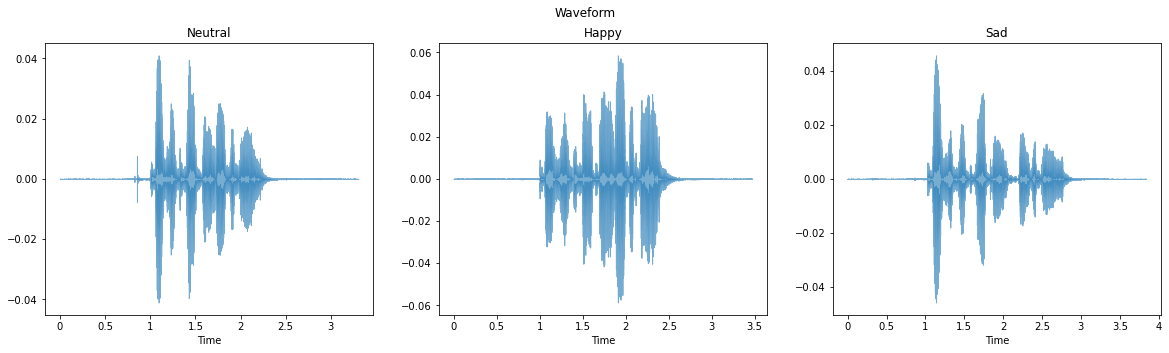

In [4]:
#waveform
fig, ax = plt.subplots(1,3,figsize=(20,5))
fig.suptitle('Waveform')
ax[0].set_title('Neutral')
ax[1].set_title('Happy')
ax[2].set_title('Sad')
for x, ax in zip(files, ax.ravel()):
    y, sr = librosa.load(x)
    librosa.display.waveshow(y, sr=sr, alpha = 0.6,ax=ax)

# Root Mean Square Energy    
Time domain    
Root mean square of all samples in each frame    
Summarises energy of each frame over the waveform    
Indicator of loudness    
Less sensitive to outlier values than amplitude envelope

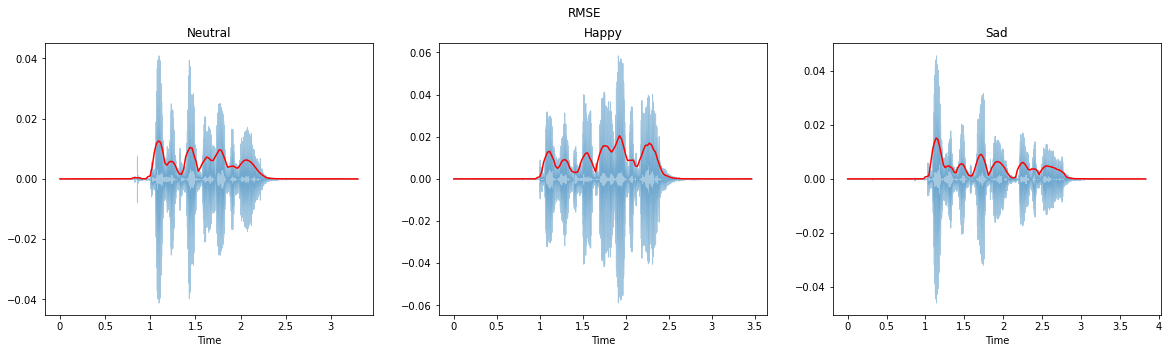

In [8]:
#rmse
fig, ax = plt.subplots(1,3,figsize=(20,5))
fig.suptitle('RMSE')
ax[0].set_title('Neutral')
ax[1].set_title('Happy')
ax[2].set_title('Sad')
for x, ax in zip(files, ax.ravel()):
    y, sr = librosa.load(x)
    #t=librosa.frames_to_time(frames,hop_length=512)
    rms=librosa.feature.rms(y=y)[0]
    t = librosa.times_like(rms)
    librosa.display.waveshow(y=y,alpha=0.4,ax=ax)
    ax.plot(t,rms, color='r')

# Spectral centroid
Measures central mass of the amplitude over time    
Weighted mean of frequencies

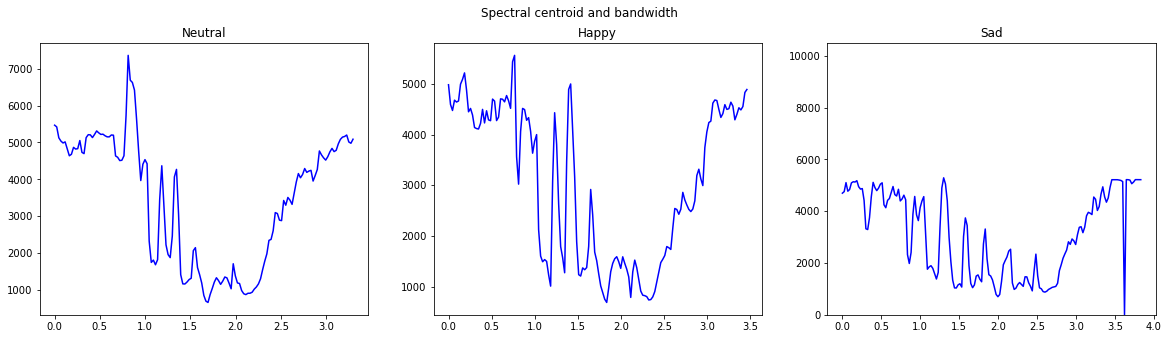

In [56]:
#spectral centroid and spectral bandwidth
fig, ax = plt.subplots(1,3,figsize=(20,5))
fig.suptitle('Spectral centroid and bandwidth')
plt.ylim(0,10500)
ax[0].set_title('Neutral')
ax[1].set_title('Happy')
ax[2].set_title('Sad')
for x, ax in zip(files, ax.ravel()):
    y, sr = librosa.load(x)    
    centroid = librosa.feature.spectral_centroid(y=y,sr=sr)
    t = librosa.times_like(centroid)
    ax.plot(t, centroid[0], label='Spectral centroid', color='b')


# Zero crossing rate    
Time domain    
Number of times signal crosses the horizontal axis    
Used extensively in speech recognition (voiced/unvoiced distinction)       


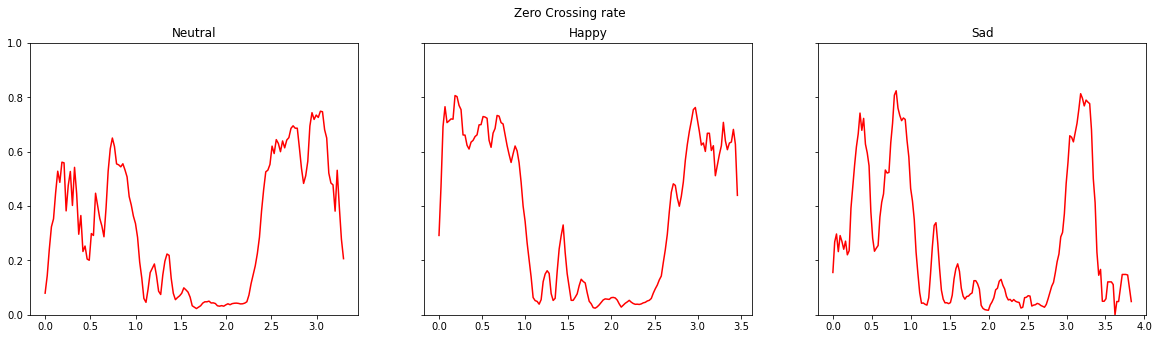

In [9]:
#zero crossing rate
fig, ax = plt.subplots(1,3,sharey=True,figsize=(20,5))
plt.ylim(0,1)
fig.suptitle('Zero Crossing rate')
ax[0].set_title('Neutral')
ax[1].set_title('Happy')
ax[2].set_title('Sad')
for x, ax in zip(files, ax.ravel()):
    y, sr = librosa.load(x)
    zcr=librosa.feature.zero_crossing_rate(y=y)[0]
    t = librosa.times_like(zcr)
    #librosa.display.waveshow(y=y,alpha=0.4,ax=ax)
    ax.plot(t,zcr,color='r')

# Spectrogram    
Fourier Transform converts from time to frequency domain    
(FT decomposes complex sound into freq compnents)    
Short time fourier transform converts to time-frequency domain    
Plots frequency over time with intensity on z axis    

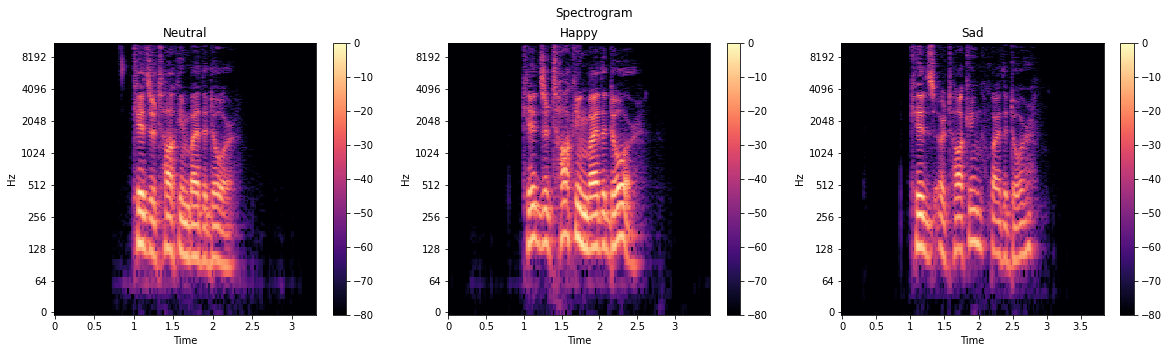

In [50]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
fig.suptitle('Spectrogram')
ax[0].set_title('Neutral')
ax[1].set_title('Happy')
ax[2].set_title('Sad')
for x, ax in zip(files, ax.ravel()):
    y, sr = librosa.load(x)
    stft=np.abs(librosa.stft(y))
    S_dB = librosa.amplitude_to_db(stft, ref=np.max)
    img=librosa.display.specshow(data=S_dB, x_axis='time',y_axis='log', sr=sr,ax=ax)
    fig.colorbar(img, ax=ax)

# Chromagram (STFT)    
Spectrogram data classified over 12 pitch classes

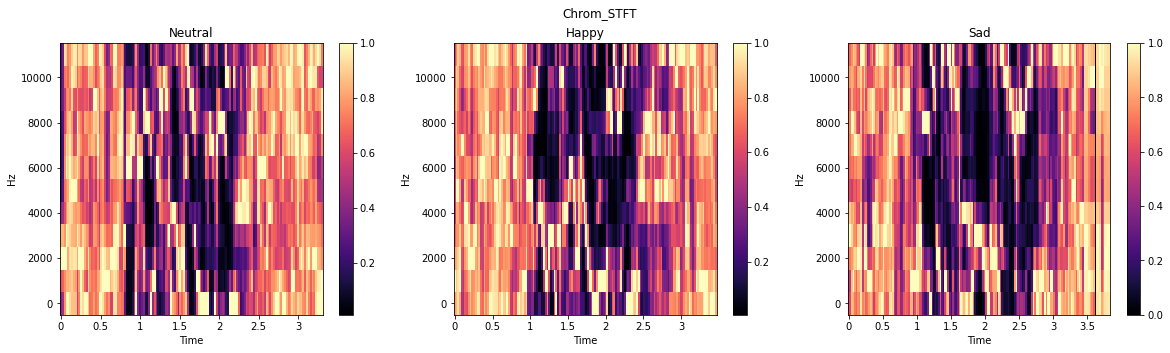

In [57]:
#chromagram
fig, ax = plt.subplots(1,3,figsize=(20,5))
fig.suptitle('Chrom_STFT')
ax[0].set_title('Neutral')
ax[1].set_title('Happy')
ax[2].set_title('Sad')
for x, ax in zip(files, ax.ravel()):
    y, sr = librosa.load(x)
    img=librosa.display.specshow(librosa.feature.chroma_stft(y=y, sr=sr),x_axis='time',y_axis='hz',ax=ax)
    plt.colorbar(img,ax=ax);

# Melspectrogram    
Spectrographic data displayed on the mel spectrum    
Melspectrum plots audio data on a pereptually relevant scale    
i.e. converts to a log scale that mimics human hearing

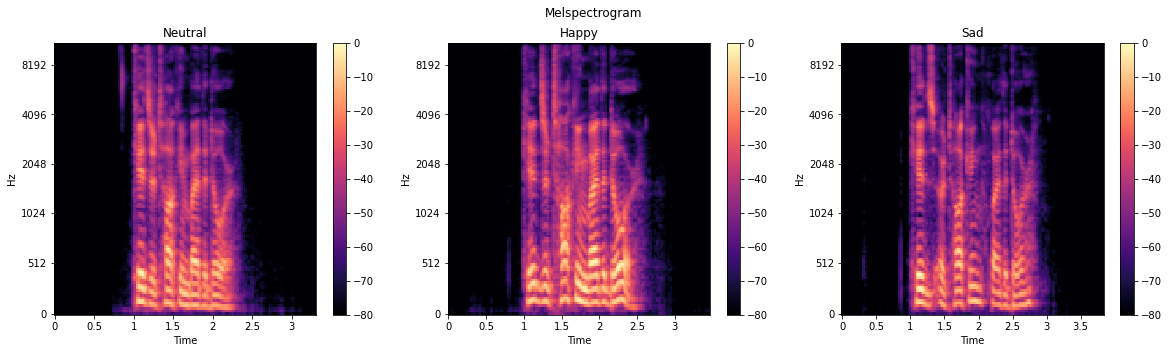

In [6]:
#melspectrum chromagram
fig, ax = plt.subplots(1,3,figsize=(20,5))
fig.suptitle('Melspectrogram')
ax[0].set_title('Neutral')
ax[1].set_title('Happy')
ax[2].set_title('Sad')
for x, ax in zip(files, ax.ravel()):
    y, sr = librosa.load(x)
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_dB = librosa.power_to_db(S, ref=np.max)
    img=librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr,ax=ax)
    fig.colorbar(img, ax=ax)

# MFCC
Cepstral representation on the mel scale    
Cepstrum = inverse fourier transform applied to spectrum data (spectrum of a spectrum)    
Glottal pulse information distinct from spectral envelope    
Signal > FT > Power Spectrum (freq domain) > Log > Log power spectrum > IFT > Cepstrum (quefrency domain)

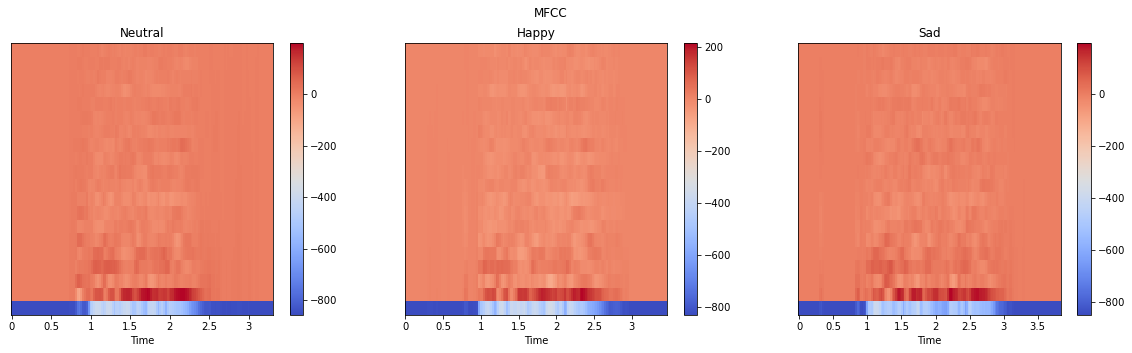

In [68]:
#MFCC
fig, ax = plt.subplots(1,3,figsize=(20,5))
fig.suptitle('MFCC')
ax[0].set_title('Neutral')
ax[1].set_title('Happy')
ax[2].set_title('Sad')
for x, ax in zip(files, ax.ravel()):
    y, sr = librosa.load(x)
    mfccs=librosa.feature.mfcc(y=y,sr=sr)
    img=librosa.display.specshow(mfccs,x_axis='time',ax=ax)
    plt.colorbar(img,ax=ax);

# Delta MFCC
First derivative    
Indicates change over time

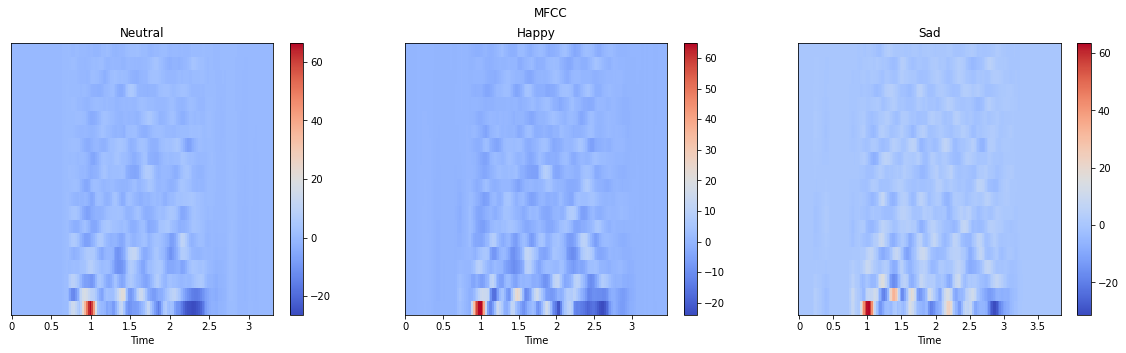

In [66]:
#DeltaMFCC
fig, ax = plt.subplots(1,3,figsize=(20,5))
fig.suptitle('MFCC')
ax[0].set_title('Neutral')
ax[1].set_title('Happy')
ax[2].set_title('Sad')
for x, ax in zip(files, ax.ravel()):
    y, sr = librosa.load(x)
    mfccs=librosa.feature.mfcc(y=y,sr=sr)
    delta_mfccs=librosa.feature.delta(mfccs)
    img=librosa.display.specshow(delta_mfccs,x_axis='time', sr=sr,ax=ax)
    plt.colorbar(img,ax=ax);

# Delta2 MFCC    
Second derivative

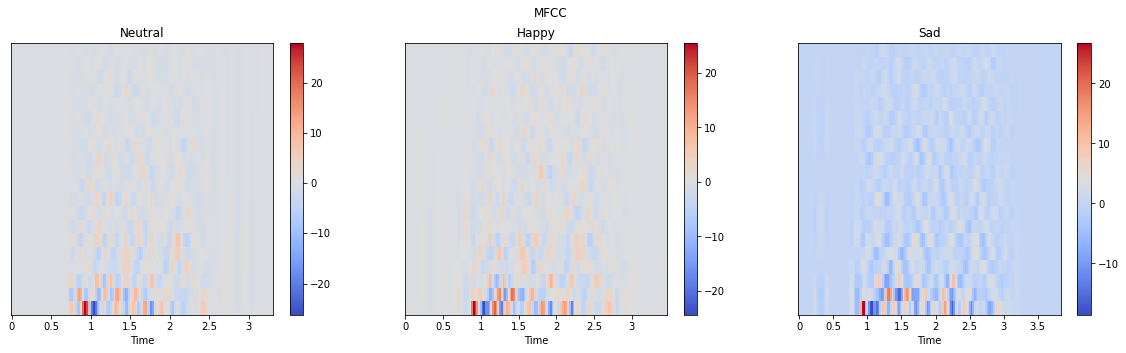

In [67]:
#Delta2MFCC
fig, ax = plt.subplots(1,3,figsize=(20,5))
fig.suptitle('MFCC')
ax[0].set_title('Neutral')
ax[1].set_title('Happy')
ax[2].set_title('Sad')
for x, ax in zip(files, ax.ravel()):
    y, sr = librosa.load(x)
    mfccs=librosa.feature.mfcc(y=y,sr=sr)
    delta2_mfccs=librosa.feature.delta(mfccs,order=2)
    img=librosa.display.specshow(delta2_mfccs,x_axis='time', sr=sr,ax=ax)
    plt.colorbar(img,ax=ax);

# Spectral contrast    
Plots difference between spectral peak and valley for each frequency subband   
Relative spectral distibution as opposed to spectral envelope

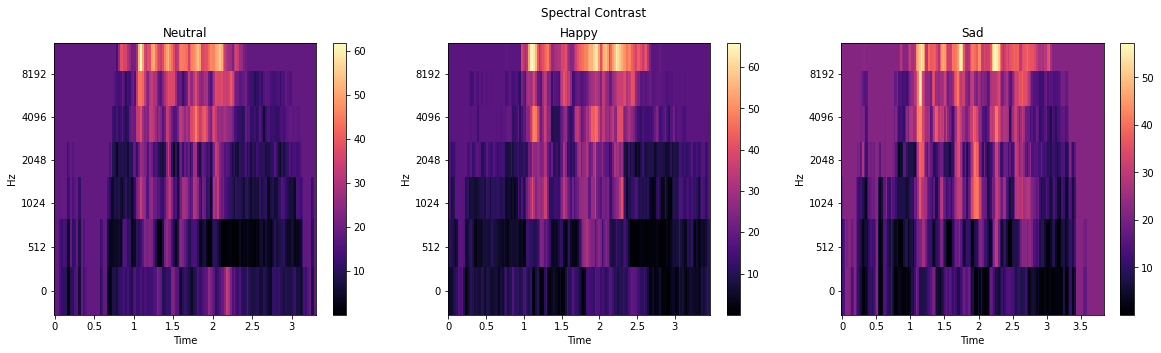

In [58]:
#spectral contrast
fig, ax = plt.subplots(1,3,figsize=(20,5))
fig.suptitle('Spectral Contrast')
ax[0].set_title('Neutral')
ax[1].set_title('Happy')
ax[2].set_title('Sad')
for x, ax in zip(files, ax.ravel()):
    y, sr = librosa.load(x)
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    contrast = librosa.feature.spectral_contrast(S=S, sr=sr)
    img=librosa.display.specshow(contrast, x_axis='time',y_axis='mel', ax=ax)
    plt.colorbar(img,ax=ax);